# Energy spectrum

In [1]:
import numpy, matplotlib.pyplot

spectrum = numpy.loadtxt("../data/co60.dat", dtype=int)
background = numpy.divide(numpy.loadtxt("../data/background.dat", dtype=int),200)
spectrum_foreground = numpy.subtract(spectrum,background)

# Values obtain in another file
peaks = [537, # Compton edge
         694, # First peak
         788] # Second peak

# Energies in keV from tables
energies = [1118,
           1173,
           1332]

## Linear fit

## NumPy's `linealg.lstsq`

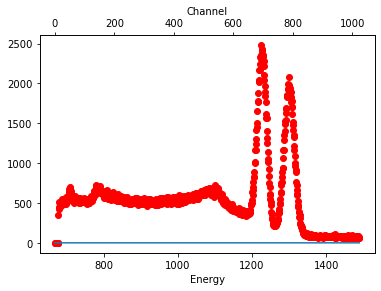

In [6]:
from numpy import ones,vstack
from numpy.linalg import lstsq

A = vstack([peaks,ones(len(peaks))]).T
m, b = lstsq(A, energies, rcond=None)[0]
lin_fit = lambda x: m*x+b

x_coordinates = [lin_fit(i) for i in range(len(spectrum_foreground))]

matplotlib.pyplot.scatter(x_coordinates, spectrum_foreground, marker="o", color="r")
axes1 = matplotlib.pyplot.gca()
axes2 = axes1.twiny()
axes2.plot(range(len(spectrum_foreground)), numpy.ones(len(x_coordinates)))
axes1.set_xlabel("Energy")
axes2.set_xlabel("Channel")
matplotlib.pyplot.show()

## Non-linear fit